# Machine Learning Final Project
# Blog Content Characterization (Morality, Emotion Analysis, Topic Analysis)

Abstract
===============
Blogs have become crucial to our daily lives, whether it be reading newsletters, and journals, documenting our stories, or following others' stories. 
Blogs are one of the important advancements of web2.0. Blog extends to other social media like Twitter and Facebook posts. <br>As important as blogs are, their content also plays a crucial role in the daily influence of their audience and writer. 
Audiences get influenced while writers become influential.<br> Characterizing blog content is analyzing and being able to label the blog by using various social metrics that are backed by a machine learning approach. With this in mind, this work will endeavor to apply various available machine learning approaches and libraries in characterizing blogs and their content helping users understand the influence of the blog or the author and attributing the written label to the blog to help users decode the underlying message of the author that the audience may not be able to infer naturally.

## Introduction

Many audiences read blogs and news articles online, and users usually bookmark their preferred blogs and subscribe to RSS (Really Simple Syndication) feeds from these blogs. <br>
Users have a limited understanding of the fact that they are being influenced by the author while some authors have a limited understanding of how much their influence is growing. <br>
Usually, some of these blogs may post information that may contain information or words that may help classify them rather than rely on the tags that the author may have given the website when creating the website. <br>

The topic analysis is used to figure out a text's topic structure, which is a picture of what topics are in a text and how they change over time. <br>The topic analysis consists of two main tasks: topic identification and text segmentation (based on topic changes). 

Emotions can be expressed verbally through emotional vocabulary or through nonverbal cues like intonation of voice, facial expressions, and gestures, all of which play an important role in human communication. <br>Most human-computer interaction (HCI) systems lack emotional intelligence and are incapable of interpreting emotions. For blog information retrieval, it is essential to characterize blog content using relevant, dependable, and distinguishing tags.

Although some authors traditionally set out to influence their audience, the majority of blog authors are usually of the opinion that they are expressing their point of view and things that they are passionate about.<br> Hence, being able to run some social analysis and using machine learning to classify these blogs will help the readers immensely to understand the author while the author will understand their content and the reason why their following is either decreasing or reducing depending on the preference of the author. <br>This is why we have introduced combined social analysis as a way of characterizing the collected blog data for this study.


## Methodology

To carry out this study, we will briefly describe each method and tool we will leverage on. 
First, we will collect blog data for about a two-year period by crawling blogs of interest. We will not use a keyword in collecting this data as we intend to use our results to describe or label these blogs by using results generated from morality, topic analysis, and emotion assessments. This will then allow us to use a classification model to classify these blogs.

### Dataset Description

The dataset to be used for this study was crawled using a crawler tool specifically focusing on indo-pacific blogs i.e blogs that discuss key issues related to the indo-pacific region, the collected blog is then stored in a CSV file and uploaded to the GitHub page link below. The repository will also house subsequent project source code implementation. 

https://github.com/nakinnubis/inpacblogdata

### Algorithm

#### Topic Analysis

We will be using Latent Semantic Analysis (LSA -NLP) for topic analysis. This approach supports singular value decomposition by keeping documents and words in a semantic space for classification hence it fits into our goal of characterizing blog post content and information.


#### Morality Analysis

For morality assessment, we will use the moral foundation theory along with a probabilistic inference to identify the changes. Using the MFT algorithm for moral quantification, this NLP approach will allow us to classify each blog post according to the appropriate moral scores.

#### Emotion Assessment

To predict emotions, we will be using Bidirectional LSTM with a CNN  and use Plutchik’s Wheel of Emotions to represent human emotions which will form the labels for each corpus of the document. We intend to have labels like joy, anger, sadness, and fear.

## Result Discussion



In [1]:
%pip install nbformat
# Import the wordcloud library
%pip install wordcloud
%pip install pyldavis


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing modules
import pandas as pd
# import os

# os.chdir('..')

In [3]:
# Read data into blogPosts
blogPosts = pd.read_csv('Indo-pacific-blog-data.csv')

# Print head
# This shows us the content of the crawled blog data for analysis purpose
blogPosts.head()

,blogpost_id,title,date,blogger,categories,post,post_length,num_outlinks,num_inlinks,num_comments,comments_url,permalink,blogsite_id,tags,location,sentiment,language,influence_score,last_modified_time
0,1,Ukraine and the ‘New Cold War: The Return of N...,2014-06-04 00:00:00,Matt Finucane,NaN,Whether the Crimean crisis heralds a new era o...,4777,12,0,2,NaN,http://afieldofviews.wordpress.com/2014/06/04/...,1,"Crimea, EU, Finland, Hungary, IMF, Neutralism,...",ES,-0.353554,English,0.0,2020-07-21 12:30:00
1,2,Guest Post: China and the Crimea Conundrum,2014-03-12 00:00:00,Matt Finucane,NaN,With the EU-US alliance’s imposition of heavy ...,9338,16,0,7,NaN,http://afieldofviews.wordpress.com/2014/03/12/...,1,"China, Crimea, Putin, Russia, Tibet, Uighurs, ...",ES,-0.177808,English,8.0,2020-07-21 12:30:00
2,3,Power vs. Interest: Ukraine’s Dwindling Options,2014-03-02 00:00:00,Matt Finucane,NaN,Predictions regarding Ukraine’s future followi...,2673,11,0,0,NaN,http://afieldofviews.wordpress.com/2014/03/02/...,1,"Crimea, Euromaidan, Invasion, Lithuania, NATO,...",ES,-0.175542,English,-3.0,2020-07-21 12:30:00
3,4,Hanging in the Balance: Ukraine’s Russian Repu...,2014-03-01 00:00:00,Matt Finucane,NaN,"Over the past four or so months, Ukraine has w...",4600,13,0,0,NaN,http://afieldofviews.wordpress.com/2014/03/01/...,1,"Crimea, EU, Euromaidan, Invasion, NATO, Putin,...",ES,-0.212766,English,-4.0,2020-07-21 12:30:00
4,5,Two Very Different Wars on Terrorism: How the ...,2014-02-03 00:00:00,Matt Finucane,NaN,"On the 29th of December, at 12:40 Moscow Time,...",5263,22,0,0,NaN,http://afieldofviews.wordpress.com/2014/02/03/...,1,"Afghanistan, bombings, Chechnya, Doku Umarov, ...",ES,-0.197037,English,-7.0,2020-07-21 12:30:00


In [4]:
# Remove the columns that are not useful for this study examples of removed columns are 'categories', 'comments_url'
blogPosts = blogPosts.drop(columns=['categories', 'comments_url'], axis=1)

# Print out the first rows of blogPosts with new updated dataframe excluding 'categories', 'comments_url'
blogPosts.head()
blogPosts.to_csv("./results/lda/Indo-pacific-blog-post.csv")

In [5]:
# Load the regular expression library
import re

# Remove punctuation and unwanted dataset to allow a more clean data when we start performing LDA on the dataset
# We used the post column for this purpose and create a new column from the dataset blog_post_processed column
blogPosts['blog_post_processed'] = \
blogPosts['post'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the all text to lowercase for the processed blogpost column
blogPosts['blog_post_processed'] = \
blogPosts['blog_post_processed'].map(lambda x: x.lower())

# Print out the head section which represents the first few columns present in the dataset
blogPosts['blog_post_processed'].head()
blog_post_processed_header = ['blogpost_id','title','date','blogger','tags','sentiment','location','blog_post_processed']
blogPosts.to_csv("./results/lda/Indo-pacific-processed-post.csv", columns=blog_post_processed_header)

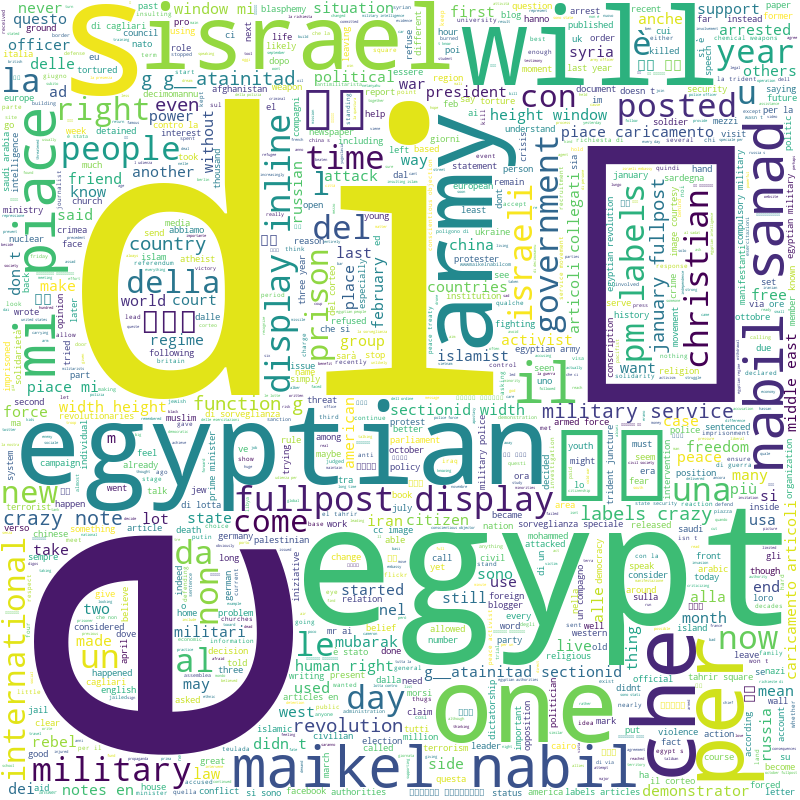

In [6]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(blogPosts['blog_post_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, width=800, contour_width=2, contour_color='steelblue', height=800)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = blogPosts['blog_post_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
# data_words
print(data_words[:1][0][:len(data_words)-1])
words = pd.DataFrame(data_words[:1][0][:len(data_words)-1])
words.to_csv("results/lda/Indo-pacific-processed-words.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asakinnubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['whether', 'crimean', 'crisis', 'heralds', 'new', 'era', 'international', 'relations', 'clearly', 'pivotal', 'moment', 'russia', 'relationship', 'west', 'world', 'balances', 'power', 'shifting', 'though', 'united', 'states', 'remains', 'unrivalled', 'sheer', 'power', 'close', 'borders', 'rising', 'china', 'increasingly', 'assertive', 'russia', 'allegedly', 'emboldened', 'obama', 'vacillations', 'syria', 'ukraine', 'grey', 'areas', 'emerging', 'states', 'vulnerable', 'revisionist', 'powers', 'alarmed', 'obama', 'hands', 'approach', 'policy', 'neutralism', 'appears', 'increasingly', 'worthy', 'revival', 'neutralism', 'defined', 'cold', 'war', 'foreign', 'policy', 'pioneered', 'finland', 'later', 'adopted', 'josip', 'tito', 'yugoslavia', 'following', 'split', 'stalin', 'geographically', 'sandwiched', 'two', 'antagonistic', 'blocs', 'neutralism', 'prescribed', 'balanced', 'relationships', 'side', 'neutral', 'states', 'reaped', 'rewards', 'otherwise', 'reserved', 'paid', 'members', 'either

In [8]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:len(corpus)-1])
corpus_terms_m = pd.DataFrame(corpus[:1][0][:len(corpus)-1])
corpus_terms_m.to_csv("results/lda/Indo-pacific-processed-corpus_terms_m.csv")

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 4), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 2),

In [9]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_ld_df = pd.DataFrame(doc_lda)
doc_ld_df.to_csv("results/lda/Indo-pacific-processed-doc_lda.csv")

[(0,
  '0.015*"di" + 0.009*"la" + 0.005*"per" + 0.005*"che" + 0.005*"un" + '
  '0.005*"il" + 0.004*"le" + 0.003*"non" + 0.003*"si" + 0.003*"della"'),
 (1,
  '0.008*"egyptian" + 0.006*"di" + 0.005*"la" + 0.005*"military" + '
  '0.004*"egypt" + 0.004*"في" + 0.004*"che" + 0.003*"army" + 0.003*"من" + '
  '0.003*"per"'),
 (2,
  '0.016*"di" + 0.010*"la" + 0.007*"che" + 0.006*"il" + 0.006*"per" + '
  '0.005*"un" + 0.005*"non" + 0.004*"si" + 0.004*"le" + 0.004*"della"'),
 (3,
  '0.008*"egyptian" + 0.007*"military" + 0.007*"di" + 0.006*"egypt" + '
  '0.005*"army" + 0.004*"israel" + 0.003*"la" + 0.003*"che" + 0.003*"peace" + '
  '0.003*"service"'),
 (4,
  '0.006*"egyptian" + 0.006*"egypt" + 0.006*"military" + 0.006*"di" + '
  '0.005*"army" + 0.005*"nabil" + 0.005*"maikel" + 0.004*"fullpost" + '
  '0.004*"pm" + 0.004*"sanad"'),
 (5,
  '0.011*"di" + 0.007*"la" + 0.006*"military" + 0.005*"il" + 0.005*"per" + '
  '0.005*"egypt" + 0.004*"un" + 0.004*"del" + 0.004*"che" + 0.003*"egyptian"'),
 (6,
  '0

In [10]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/lda/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.039982  0.006081       1        1  22.768528
2      0.027648  0.004417       2        1  18.616866
3     -0.015640  0.002174       3        1  11.837467
5      0.006732  0.020343       4        1   9.224475
7     -0.012977  0.001727       5        1   8.754220
9      0.003649 -0.034668       6        1   7.766444
6      0.010807  0.001904       7        1   7.231709
8     -0.002805 -0.000093       8        1   7.032469
1     -0.006156 -0.005743       9        1   3.546641
0      0.028723  0.003858      10        1   3.221180, topic_info=          Term        Freq       Total Category  logprob  loglift
9421        di  471.000000  471.000000  Default  30.0000  30.0000
9433        la  265.000000  265.000000  Default  29.0000  29.0000
2575  egyptian  241.000000  241.000000  Default  28.0000  28.0000
9509       che  176.000000  176.000000  Default  27.0000  27.0000
1091       per  171.000000  171.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
3844        من    2.752233  125.481080  Topic10  -6.3781  -0.3843
2575  egyptian    3.103159  241.170301  Topic10  -6.2581  -0.9177
2206      army    2.727506  168.882576  Topic10  -6.3871  -0.6904
1288    israel    2.381201  127.146139  Topic10  -6.5229  -0.5423
2574     egypt    2.391621  215.399655  Topic10  -6.5185  -1.0651

[770 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6076      1  0.362165    abbas
6076      5  0.362165    abbas
339       1  0.199317  account
339       4  0.332196  account
339       5  0.132878  account
...     ...       ...      ...
8183      7  0.215722   يديعوت
7550      4  0.469722    يشارك
9200      3  0.650302    ينسحب
9137      8  0.762048   ينظروا
7578      3  0.408791     يوجد

[2026 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 6, 8, 10, 7, 9, 2, 1])

#### Morality Analysis

In [11]:
%pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
template_input = pd.read_csv('data/Indo-pacific-blog-data_morality.csv', header=None)
template_input.head()

,0
0,whether the crimean crisis heralds a new era o...
1,with the eu-us alliance’s imposition of heavy ...
2,predictions regarding ukraine’s future followi...
3,over the past four or so months ukraine has wi...
4,on the 29th of december at 12:40 moscow time a...


In [14]:
from emfdscore.scoring import score_docs 

num_docs = len(template_input)

DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'vice-virtue'
OUT_CSV_PATH = 'all-vv.csv'

df = score_docs(template_input,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
df.to_csv(OUT_CSV_PATH, index=False)

C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_

In [15]:
# Inspect output 
all_vv = pd.read_csv('all-vv.csv')
all_vv.head()

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral_nonmoral_ratio,f_var
0,0.025813,0.040756,0.041035,0.043776,0.032490,0.085779,0.064670,0.069182,0.063831,0.050735,0.898551,0.000347
1,0.032497,0.045179,0.041242,0.038531,0.033446,0.080050,0.060778,0.062401,0.065670,0.050706,1.098039,0.000247
2,0.029079,0.037527,0.047058,0.038194,0.034418,0.073551,0.071752,0.053250,0.069690,0.047517,0.762712,0.000268
3,0.024487,0.036003,0.031610,0.025736,0.022494,0.084307,0.071763,0.064278,0.084042,0.062265,0.938776,0.000632
4,0.026616,0.034803,0.036146,0.032257,0.025255,0.095315,0.065966,0.068311,0.072123,0.059019,0.894273,0.000565


In [16]:
from emfdscore.scoring import score_docs 

num_docs = len(template_input)

DICT_TYPE = 'emfd'
PROB_MAP = 'single'
SCORE_METHOD = 'bow'
OUT_METRICS = 'vice-virtue'
OUT_CSV_PATH = 'single-vv.csv'

df = score_docs(template_input,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
df.to_csv(OUT_CSV_PATH, index=False)

C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_

In [17]:
# Inspect output 
single_vv = pd.read_csv('single-vv.csv')
single_vv.head()

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral_nonmoral_ratio,moral,f_var
0,0.009576,0.017563,0.011173,0.023902,0.003701,0.036411,0.012417,0.024696,0.015406,0.000995,0.898551,NaN,0.000112
1,0.014437,0.016429,0.010692,0.010348,0.006805,0.035118,0.011961,0.018199,0.023612,0.004913,1.098039,NaN,0.000079
2,0.006674,0.020282,0.019311,0.016458,0.003080,0.024408,0.033920,0.008401,0.016394,0.000000,0.762712,NaN,0.000109
3,0.009176,0.014830,0.006312,0.010266,0.003775,0.035290,0.017913,0.014571,0.032315,0.010671,0.938776,NaN,0.000110
4,0.005660,0.016019,0.013462,0.009549,0.002988,0.053781,0.010614,0.016518,0.021060,0.004487,0.894273,NaN,0.000215


In [18]:
from emfdscore.scoring import score_docs 

num_docs = len(template_input)

DICT_TYPE = 'mfd2'
PROB_MAP = ''
SCORE_METHOD = 'bow'
OUT_METRICS = ''
OUT_CSV_PATH = 'mfd2.csv'

df = score_docs(template_input,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
df.to_csv(OUT_CSV_PATH, index=False)

C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_

In [19]:
# Inspect output 
mfd2 = pd.read_csv('mfd2.csv')
mfd2.head()

,care.virtue,care.vice,authority.virtue,fairness.vice,fairness.virtue,loyalty.vice,loyalty.virtue,sanctity.virtue,authority.vice,sanctity.vice,moral_nonmoral_ratio,f_var
0,0.100000,0.300000,0.250000,0.0,0.000000,0.000000,0.250000,0.000000,0.0000,0.100000,0.053619,0.015000
1,0.114286,0.200000,0.371429,0.0,0.057143,0.000000,0.257143,0.000000,0.0000,0.000000,0.049020,0.017823
2,0.428571,0.285714,0.142857,0.0,0.000000,0.000000,0.142857,0.000000,0.0000,0.000000,0.034826,0.022902
3,0.062500,0.187500,0.125000,0.0,0.000000,0.000000,0.437500,0.062500,0.0625,0.062500,0.043956,0.017535
4,0.052632,0.421053,0.052632,0.0,0.026316,0.026316,0.368421,0.026316,0.0000,0.026316,0.096939,0.024592


In [20]:
from emfdscore.scoring import score_docs 

num_docs = len(template_input)

DICT_TYPE = 'mfd'
PROB_MAP = ''
SCORE_METHOD = 'bow'
OUT_METRICS = ''
OUT_CSV_PATH = 'mfd.csv'

df = score_docs(template_input,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
df.to_csv(OUT_CSV_PATH, index=False)

C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_

In [21]:
# Inspect output 
mfd = pd.read_csv('mfd.csv')
mfd.head()

,care.virtue,fairness.virtue,loyalty.virtue,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
0,0.058824,0.117647,0.117647,0.117647,0.058824,0.352941,0.0,0.058824,0.000000,0.058824,0.058824,0.045213,0.010150
1,0.200000,0.000000,0.133333,0.200000,0.066667,0.233333,0.0,0.100000,0.000000,0.000000,0.166667,0.041725,0.008840
2,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.029703,0.025926
3,0.117647,0.000000,0.000000,0.058824,0.117647,0.294118,0.0,0.117647,0.176471,0.000000,0.117647,0.046832,0.009419
4,0.027027,0.027027,0.162162,0.027027,0.000000,0.540541,0.0,0.189189,0.000000,0.000000,0.027027,0.094148,0.029089


In [22]:
def label_morality_data():
    
    pass

In [23]:
def label_moraltiy_score():
    pass

# Emotion Analysis

In [24]:
%pip install tensorflow
%pip install keras
%pip3 install torch torchvision torchaudio

%pip install git+https://github.com/UBC-NLP/EmoNet.git


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras in c:\python310\lib\site-packages (2.9.0)

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



UsageError: Line magic function `%pip3` not found.


In [25]:
from emonet import EmoNet
import pandas as pd 
em = EmoNet()

In [26]:
# Predict text in a tsv file line by line
blogPosts = pd.read_csv('results/lda/Indo-pacific-processed-post.csv')
processedBlogPost =  blogPosts.blog_post_processed
processedBlogPost
def predict_labels(post):
    predictions = em.predict(post)
    predictions = predictions[0]
    (label, score) = predictions 
    return label

In [27]:
def predict_scores(post):
    predictions = em.predict(post)
    predictions = predictions[0]
    (label, score) = predictions 
    return score

In [28]:
blogPosts['emotion'] = blogPosts.apply(lambda row: predict_labels(row['blog_post_processed']), axis=1)
blogPosts['emotions_score'] = blogPosts.apply(lambda row: predict_scores(row['blog_post_processed']), axis=1)
blogPosts.head()

blogPosts.to_csv('results/emos/Indo-pacific-processed-post-emotions.csv')

# Blog Text-Classification using Logistic Regression


In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [30]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asakinnubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
dataset = pd.read_csv('data/Indo-pacific-processed-post-emotions.csv')
dataset.head()

,Unnamed: 0.1,Unnamed: 0,blogpost_id,title,date,blogger,tags,sentiment,location,blog_post_processed,emotion,emotions_score
0,0,0,1,Ukraine and the ‘New Cold War: The Return of N...,2014-06-04 00:00:00,Matt Finucane,"Crimea, EU, Finland, Hungary, IMF, Neutralism,...",-0.353554,ES,whether the crimean crisis heralds a new era o...,fear,0.340458
1,1,1,2,Guest Post: China and the Crimea Conundrum,2014-03-12 00:00:00,Matt Finucane,"China, Crimea, Putin, Russia, Tibet, Uighurs, ...",-0.177808,ES,with the eu-us alliance’s imposition of heavy ...,fear,0.344225
2,2,2,3,Power vs. Interest: Ukraine’s Dwindling Options,2014-03-02 00:00:00,Matt Finucane,"Crimea, Euromaidan, Invasion, Lithuania, NATO,...",-0.175542,ES,predictions regarding ukraine’s future followi...,fear,0.438030
3,3,3,4,Hanging in the Balance: Ukraine’s Russian Repu...,2014-03-01 00:00:00,Matt Finucane,"Crimea, EU, Euromaidan, Invasion, NATO, Putin,...",-0.212766,ES,over the past four or so months ukraine has wi...,disgust,0.902291
4,4,4,5,Two Very Different Wars on Terrorism: How the ...,2014-02-03 00:00:00,Matt Finucane,"Afghanistan, bombings, Chechnya, Doku Umarov, ...",-0.197037,ES,on the 29th of december at 12:40 moscow time a...,anticipation,0.461333


In [32]:
dataset = dataset.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

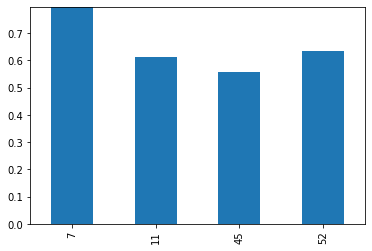

In [33]:
dataset.groupby('emotion').emotions_score.plot.bar(ylim=0)
plt.show()

In [34]:
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['blog_post_processed'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asakinnubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
dataset.head()

,blogpost_id,title,date,blogger,tags,sentiment,location,blog_post_processed,emotion,emotions_score,cleaned
0,1,Ukraine and the ‘New Cold War: The Return of N...,2014-06-04 00:00:00,Matt Finucane,"Crimea, EU, Finland, Hungary, IMF, Neutralism,...",-0.353554,ES,whether the crimean crisis heralds a new era o...,fear,0.340458,whether crimean crisi herald new era intern re...
1,2,Guest Post: China and the Crimea Conundrum,2014-03-12 00:00:00,Matt Finucane,"China, Crimea, Putin, Russia, Tibet, Uighurs, ...",-0.177808,ES,with the eu-us alliance’s imposition of heavy ...,fear,0.344225,eu us allianc imposit heavi sanction russia de...
2,3,Power vs. Interest: Ukraine’s Dwindling Options,2014-03-02 00:00:00,Matt Finucane,"Crimea, Euromaidan, Invasion, Lithuania, NATO,...",-0.175542,ES,predictions regarding ukraine’s future followi...,fear,0.438030,predict regard ukrain futur follow russian inv...
3,4,Hanging in the Balance: Ukraine’s Russian Repu...,2014-03-01 00:00:00,Matt Finucane,"Crimea, EU, Euromaidan, Invasion, NATO, Putin,...",-0.212766,ES,over the past four or so months ukraine has wi...,disgust,0.902291,past four month ukrain wit protest riot dwarf ...
4,5,Two Very Different Wars on Terrorism: How the ...,2014-02-03 00:00:00,Matt Finucane,"Afghanistan, bombings, Chechnya, Doku Umarov, ...",-0.197037,ES,on the 29th of december at 12:40 moscow time a...,anticipation,0.461333,th decemb moscow time explos gut entranc volgo...


In [36]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

(200, 3052)

C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asakinnubi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         7
anticipation       0.00      0.00      0.00         8
     disgust       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         8
         joy       0.44      1.00      0.61        22
       trust       0.00      0.00      0.00         2

    accuracy                           0.44        50
   macro avg       0.07      0.17      0.10        50
weighted avg       0.19      0.44      0.27        50

[[ 0  0  0  0  7  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  2  0]]


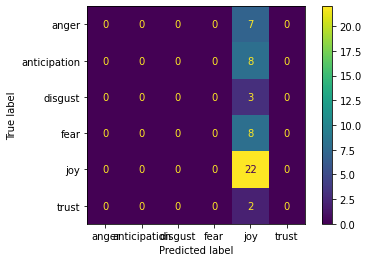

In [37]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X = dataset['cleaned']
Y = dataset['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))
plot_confusion_matrix(model, X_test, ytest)  
plt.show()